In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

from tensorflow.keras import layers, models


2024-03-12 05:29:12.912900: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-12 05:29:12.912994: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-12 05:29:13.032741: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
def unpickle(file):
   
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
# Unpickle data_batch_1
data_batch_1 = unpickle('/kaggle/input/my-cifar-dataset/data_batch_1')

# Unpickle data_batch_2
data_batch_2 = unpickle('/kaggle/input/my-cifar-dataset/data_batch_2')

# Unpickle data_batch_3
data_batch_3 = unpickle('/kaggle/input/my-cifar-dataset/data_batch_3')

# Unpickle data_batch_4
data_batch_4 = unpickle('/kaggle/input/my-cifar-dataset/data_batch_4')

# Unpickle data_batch_5
data_batch_5 = unpickle('/kaggle/input/my-cifar-dataset/data_batch_5')

# Unpickle data_batch_test
data_batch_test = unpickle('/kaggle/input/my-cifar-dataset/test_batch')


In [5]:
test_data=data_batch_test[b'data']
test_label=data_batch_test[b'labels']
test_data = np.array(test_data)



test_data = test_data.reshape(-1, 32, 32, 3)


In [6]:
columns = data_batch_1.keys()
print("Columns of data_dict:", columns)

Columns of data_dict: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [7]:
def visualize_data(data_dict):
  
    data = data_dict[b'data']
    labels = data_dict[b'labels']
    
    # Define class labels
    classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
    
    # Create a figure with 10 subplots (one for each class)
    fig, axs = plt.subplots(1, 10, figsize=(15, 2), sharey=True)
    
    # Iterate over each class
    for i in range(10):
        # Find the index of the first image with the corresponding class label
        idx = labels.index(i)
        
        # Extract the image data for the first image of the current class
        image = data[idx].reshape(3, 32, 32).transpose(1, 2, 0)
        
        # Display the image
        axs[i].imshow(image)
        axs[i].set_title(classes[i])
        axs[i].axis('off')

    plt.show()



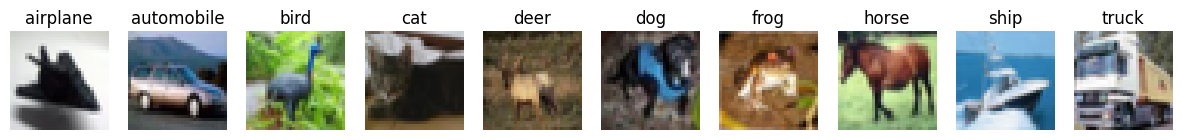

In [8]:
visualize_data(data_batch_1)

In [9]:
data_batches=['/kaggle/input/my-cifar-dataset/data_batch_1','/kaggle/input/my-cifar-dataset/data_batch_2','/kaggle/input/my-cifar-dataset/data_batch_3','/kaggle/input/my-cifar-dataset/data_batch_4','/kaggle/input/my-cifar-dataset/data_batch_5']
data=[]
labels=[]
for batch_file_name in data_batches:
    
    batch_data = unpickle(batch_file_name)
    data.extend(batch_data[b'data'])
    labels.extend(batch_data[b'labels'])
    
    



In [10]:
train_ratio = 0.8
val_ratio = 0.2

# Calculate the sizes of training and validation sets
num_samples = len(data)
num_train_samples = int(train_ratio * num_samples)
num_val_samples = num_samples - num_train_samples

# Split the data and labels into training and validation sets
train_data = data[:num_train_samples]
train_labels = labels[:num_train_samples]
val_data = data[num_train_samples:]
val_labels = labels[num_train_samples:]

print("No of training samples", num_train_samples)
print("No of validation samples", num_val_samples)
      

No of training samples 40000
No of validation samples 10000


In [11]:
train_data = np.array(train_data)
val_data = np.array(val_data)


train_data = train_data.reshape(-1, 32, 32, 3)
val_data = val_data.reshape(-1, 32, 32, 3)


In [12]:
# Convert labels to one-hot encoded vectors
num_classes = 10
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes)
val_labels = tf.keras.utils.to_categorical(val_labels, num_classes)
test_labels=tf.keras.utils.to_categorical(test_label, num_classes)

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Add dropout after max pooling

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Add dropout after max pooling

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Dropout(0.25))  # Add dropout after max pooling
model.add(layers.Flatten())
model.add(layers.Dropout(0.4))   # Add dropout before dense layer
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

In [22]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 10, 10, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,740,618 (6.64 MB)

 Trainable params: 1,740,618 (6.64 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
# Train the model
history = model.fit(train_data, train_labels, epochs=80, batch_size=64, validation_data=(val_data, val_labels))


Epoch 1/80
 25/625 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1023 - loss: 10.4280  

W0000 00:00:1710221502.238170     102 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2140 - loss: 2.7640

W0000 00:00:1710221506.837105     100 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.2142 - loss: 2.7617 - val_accuracy: 0.3535 - val_loss: 1.7305
Epoch 2/80
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3826 - loss: 1.6989 - val_accuracy: 0.4483 - val_loss: 1.5143
Epoch 3/80
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4300 - loss: 1.5774 - val_accuracy: 0.4203 - val_loss: 1.5871
Epoch 4/80
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4570 - loss: 1.5164 - val_accuracy: 0.4424 - val_loss: 1.5318
Epoch 5/80
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4642 - loss: 1.4738 - val_accuracy: 0.4951 - val_loss: 1.4062
Epoch 6/80
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4875 - loss: 1.4258 - val_accuracy: 0.4873 - val_loss: 1.4436
Epoch 7/80
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5059 - loss: 1.3885 - val_accuracy: 0.5255 - val_loss: 1.3110
Epoch 8/80
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5100 - loss: 1.3700 - val_accuracy: 0.5325 - val

In [25]:

# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6302 - loss: 1.1113
Test accuracy: 0.6306999921798706


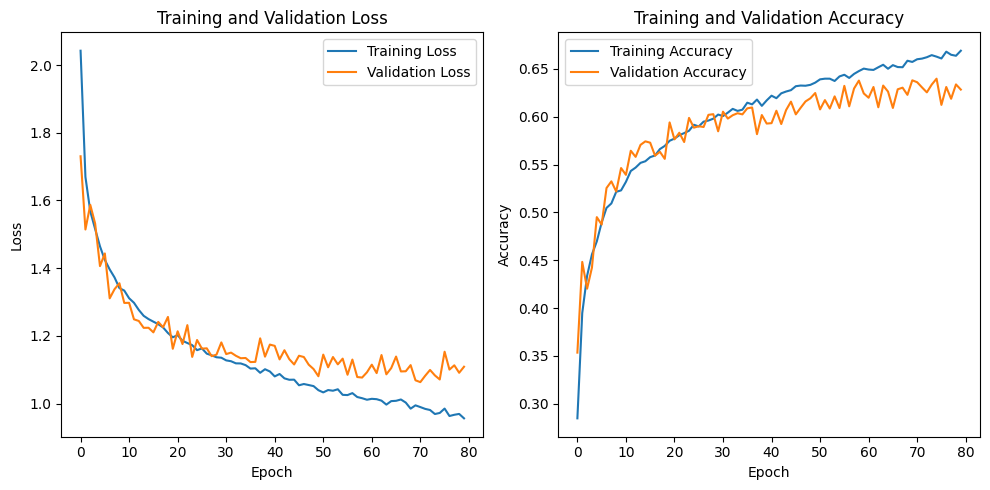

In [26]:
# Get training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


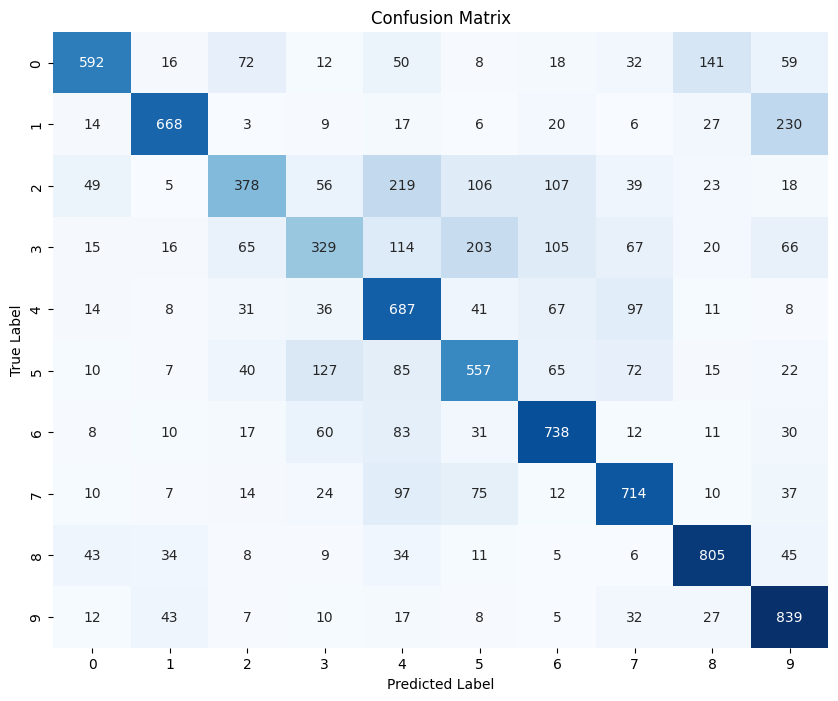

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import top_k_accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

prediction_probs=model.predict([test_data])
# Convert predicted probabilities to class predictions
pred_classes = np.argmax(prediction_probs, axis=1)

# Convert one-hot encoded test labels to class labels
true_classes = np.argmax(test_labels, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(true_classes, pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()




In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import top_k_accuracy_score

# Convert one-hot encoded test labels to class labels
true_classes = np.argmax(test_labels, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(true_classes, pred_classes)
precision = precision_score(true_classes, pred_classes, average='weighted')
recall = recall_score(true_classes, pred_classes, average='weighted')
f1 = f1_score(true_classes, pred_classes, average='weighted')
top5_accuracy = top_k_accuracy_score(true_classes, prediction_probs, k=5)

# Print the results
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Top-5 Accuracy: {top5_accuracy}")


Evaluation Metrics:
Accuracy: 0.6307
Precision: 0.636687078653065
Recall: 0.6307
F1-score: 0.623851435298576
Top-5 Accuracy: 0.9512


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


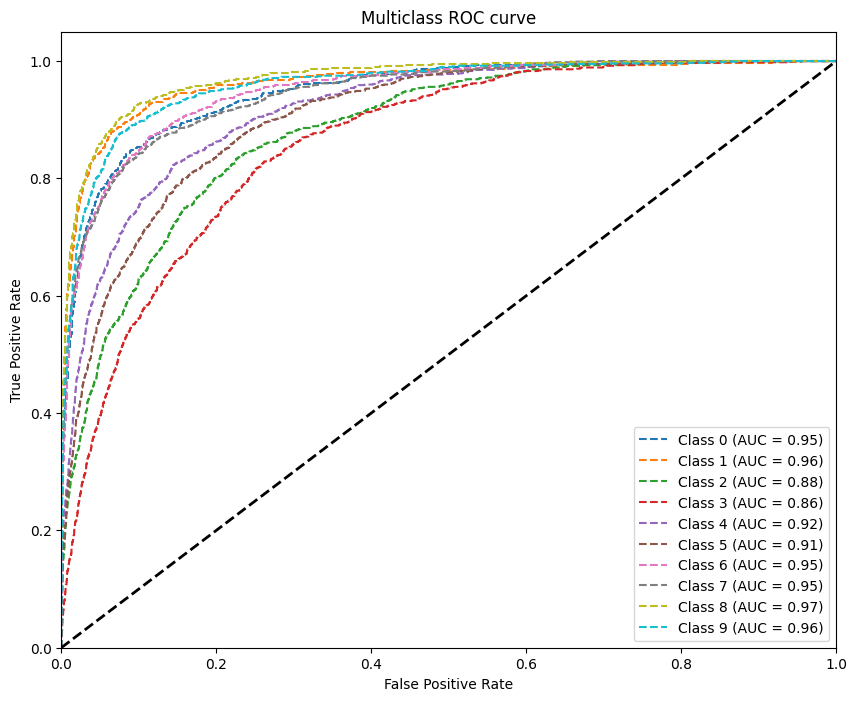

In [29]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for each class
pred_prob = model.predict(test_data)

# roc curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):    
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC curve')
plt.legend(loc='best')
plt.savefig('Multiclass ROC', dpi=300)
plt.show()
